### K-NN (alborytm k najbliższych sąsiadów)

In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# Load data
df = pd.read_parquet('./IDS2017/Final/DDoS_Attacks.parquet')
print(df.columns)

# Encodowanie Label i rozdzielenie od reszty danych
label_encoder = LabelEncoder()
df[' Label'] = label_encoder.fit_transform(df[' Label'])

X = df.drop(' Label', axis=1)
y = df[' Label']

# Podział danych na testowe i treningowe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale (polecało zrobić)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Index([' Label', ' Destination Port', 'Total Length of Fwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Mean',
       ' Fwd Header Length', ' Avg Fwd Segment Size', ' Subflow Fwd Bytes',
       'Init_Win_bytes_forward', ' act_data_pkt_fwd'],
      dtype='object')


In [18]:
# Inicjalizacja klasyfikatora K-NN
knn = KNeighborsClassifier(n_neighbors=5)

# Uczenie modelu
knn.fit(X_train_scaled, y_train)

# Przewidywanie na zbiorze testowym
y_pred = knn.predict(X_test_scaled)

# Ocena dokładności
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9971636513311755

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     64165
           1       1.00      1.00      1.00    203080

    accuracy                           1.00    267245
   macro avg       1.00      1.00      1.00    267245
weighted avg       1.00      1.00      1.00    267245



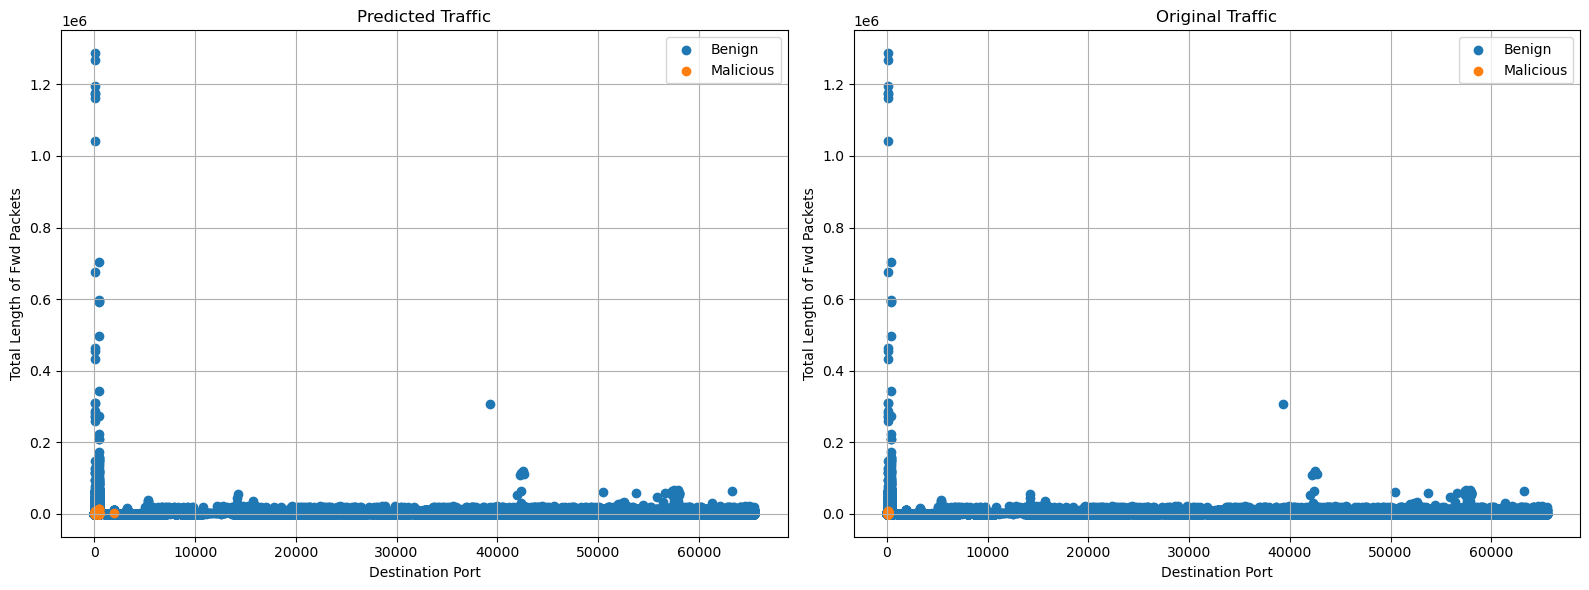

In [15]:
# Dziwne fikołki żeby narysować ploty do porównania

# Filtrowanie na Benign/Malicious na podstawie oryginalnych etykiet
df_test_original = X_test.copy()
df_test_original[' Label'] = y_test
df_test_original['Original_Label'] = df.loc[df_test_original.index, ' Label']

df_test_original[' Label'] = label_encoder.inverse_transform(df_test_original[' Label'])
df_test_original['Original_Label'] = label_encoder.inverse_transform(df_test_original['Original_Label'])

benign_original = df_test_original[df_test_original['Original_Label'] == 'BENIGN']
malicious_original = df_test_original[df_test_original['Original_Label'] != 'BENIGN']

# Filtrowanie na Benign/Malicious na podstawie przewidzianych etykiet
y_pred = knn.predict(X_test_scaled)
df_test = X_test.copy()
df_test[' Label'] = y_test
df_test['Predicted_Label'] = y_pred

df_test[' Label'] = label_encoder.inverse_transform(df_test[' Label'])
df_test['Predicted_Label'] = label_encoder.inverse_transform(df_test['Predicted_Label'])

benign_data = df_test[df_test['Predicted_Label'] == 'BENIGN']
malicious_data = df_test[df_test['Predicted_Label'] != 'BENIGN']

# Plots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Benign Traffic
axs[0].scatter(benign_data[' Destination Port'], benign_data['Total Length of Fwd Packets'], label='Benign')
axs[0].scatter(malicious_data[' Destination Port'], malicious_data['Total Length of Fwd Packets'], label='Malicious')
axs[0].set_title('Predicted Traffic')
axs[0].set_xlabel('Destination Port')
axs[0].set_ylabel('Total Length of Fwd Packets')
axs[0].legend()
axs[0].grid(True)

# Malicious Traffic
axs[1].scatter(benign_original[' Destination Port'], benign_original['Total Length of Fwd Packets'], label='Benign')
axs[1].scatter(malicious_original[' Destination Port'], malicious_original['Total Length of Fwd Packets'], label='Malicious')
axs[1].set_title('Original Traffic')
axs[1].set_xlabel('Destination Port')
axs[1].set_ylabel('Total Length of Fwd Packets')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()